In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta_backtesting import PairsTrading
from stock_pairs_trading import StockPairsTrading

In [55]:
df1 = yf.download(['EWJ'],period='1y',interval='1d')['Adj Close']
df4 = yf.download(['TUR'],period='1y',interval='1d')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
np.corrcoef(df1.values,df4.values)

array([[ 1.        , -0.03875913],
       [-0.03875913,  1.        ]])

In [ ]:
pt = PairsTrading(
    start="2022-01-01",
    end="2024-05-01",
    approach="log",
    window=10,
    zscore_treshold=1,
    timeframe = '1d'
    )

In [ ]:
pt.signal(("AAPL","MSFT")).set_index('Date')['zscore'].plot()

In [ ]:
pt.signal(("MSFT","AAPL")).set_index('Date')['zscore'].plot()

In [ ]:
pt.signal(("AAPL","MSFT")).set_index('Date').tz_localize(None).to_excel("apl.xlsx")

In [ ]:
pt.signal(("MSFT","AAPL")).set_index('Date').tz_localize(None).to_excel("msft.xlsx")

In [ ]:
df = pt.backtest(("AAPL","MSFT"))

In [ ]:
df.dropna(subset=['EntrySignal']).sort_values('Date', ascending=False).iloc[0]

In [ ]:
df.dropna(subset=['ExitSignal']).sort_values('Date', ascending=False).iloc[0]

# New Backtesting 

In [1]:
from backtest_lib import *

In [8]:
#df=bt_regular(sign(pair=["TUPRS.IS","ASELS.IS"],start_date="2022-01-01",end_date="2023-11-01",interval='1d',window=10),shifted_signal=False)

In [2]:
df=bt_lag(sign(pair=["THYAO.IS","PGSUS.IS"],start_date="2023-01-01",end_date="2023-12-08",interval='1d',window=10),shifted_signal=True,z_lag=14)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
df=bt_ma(sign(pair=["NVDA","META"],start_date="2023-01-01",end_date="2023-12-08",interval='1d',window=10),shifted_signal=True,z_ma=14)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

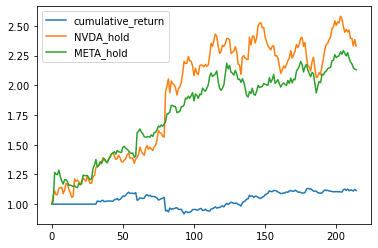

In [10]:
df[df.columns[-3:]].plot()

<AxesSubplot:>

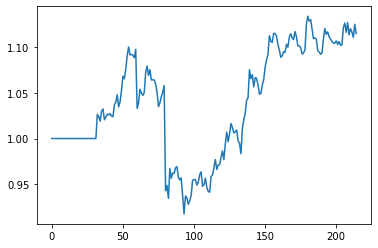

In [11]:
df['cumulative_return'].plot()

<AxesSubplot:>

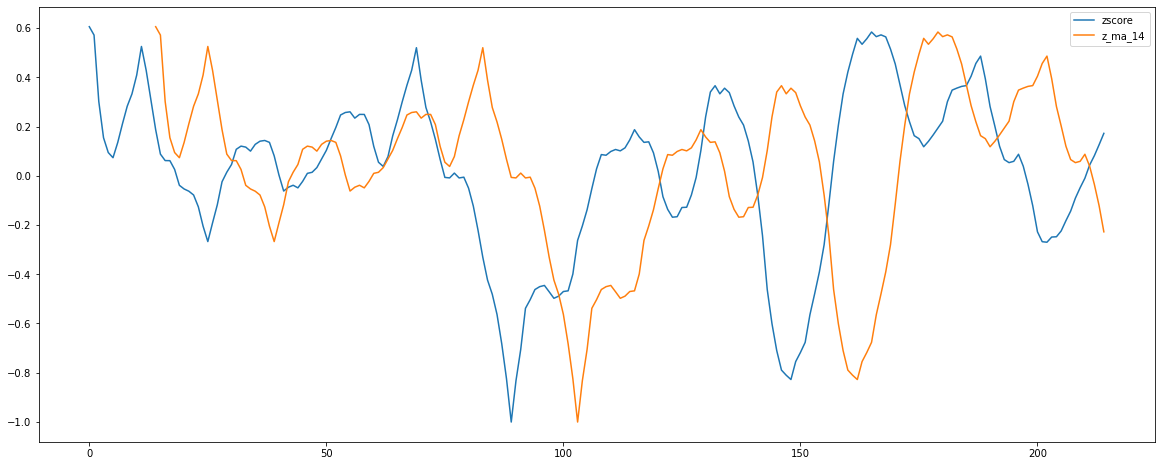

In [12]:
df[['zscore','z_ma_14']].plot(figsize=(20,8))

In [13]:
latest_signal(df)

{'Date': Timestamp('2023-12-01 00:00:00'),
 'latest_entry': 'LongEntry',
 'latest_exit': 'ShortCover'}

In [14]:
df.dropna(subset=['EntrySignal']).iloc[-1]

index                2023-12-01 00:00:00
NVDA                          467.608887
META                          324.820007
zscore                          0.043746
NVDA_returns                   -0.000107
META_returns                   -0.007122
EntrySignal                    LongEntry
ExitSignal                    ShortCover
NVDA_position                      short
META_position                       long
NVDA_return_nom                 0.233322
META_return_nom                 -0.00047
NVDA_return_cum                 1.233322
META_return_cum                  0.99953
z_ma_14                         0.039282
nominal_return                  0.232852
NVDA_buy                        1.970306
META_buy                        1.848893
cumulative_return               1.116426
NVDA_hold                       2.394515
META_hold                       2.180439
Name: 211, dtype: object

In [4]:
#latest_signal(bt_ma(sign(pair=["TUPRS.IS","ASELS.IS"],start_date="2022-01-01",end_date="2023-11-01",interval='1d',window=10),shifted_signal=False))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'Date': Timestamp('2023-10-10 00:00:00'),
 'latest_entry': 'LongEntry',
 'latest_exit': 'ShortCover'}

In [3]:
df

,index,THYAO.IS,PGSUS.IS,zscore,THYAO.IS_returns,PGSUS.IS_returns,EntrySignal,ExitSignal,THYAO.IS_position,PGSUS.IS_position,...,PGSUS.IS_return_nom,THYAO.IS_return_cum,PGSUS.IS_return_cum,z_lag_14,nominal_return,THYAO.IS_buy,PGSUS.IS_buy,cumulative_return,THYAO.IS_hold,PGSUS.IS_hold
0,2023-01-27,149.800003,543.599976,0.163144,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,1.000000,1.000000,1.000000
1,2023-01-30,144.800003,509.100006,0.164480,-0.033378,-0.063466,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,NaN,0.000000,0.966622,0.936534,1.000000,0.966622,0.936534
2,2023-01-31,137.600006,494.100006,0.221495,-0.049724,-0.029464,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,NaN,0.000000,0.916898,0.907071,1.000000,0.918558,0.908940
3,2023-02-01,130.800003,483.299988,0.346092,-0.049419,-0.021858,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,NaN,0.000000,0.867480,0.885213,1.000000,0.873164,0.889073
4,2023-02-02,134.600006,486.899994,0.394913,0.029052,0.007449,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,NaN,0.000000,0.896532,0.892661,1.000000,0.898531,0.895695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2023-11-30,251.000000,705.000000,-1.037494,-0.015686,-0.013986,NaN,NaN,short,long,...,-0.390935,1.328527,0.609065,-0.304272,-0.062407,1.638391,1.375363,0.968796,1.675567,1.296910
209,2023-12-01,260.750000,714.500000,-1.009759,0.038845,0.013475,NaN,NaN,short,long,...,-0.377460,1.289683,0.622540,-0.295445,-0.087777,1.677236,1.388839,0.956112,1.740654,1.314386
210,2023-12-04,262.000000,718.500000,-1.007778,0.004794,0.005598,NaN,NaN,short,long,...,-0.371861,1.284889,0.628139,-0.303300,-0.086972,1.682029,1.394437,0.956514,1.748999,1.321744
211,2023-12-05,259.000000,710.000000,-0.946707,-0.011450,-0.011830,NaN,NaN,short,long,...,-0.383691,1.296339,0.616309,-0.312347,-0.087352,1.670579,1.382607,0.956324,1.728972,1.306107
